# Differential Evolution

Differential evolution (DE) is a population-based metaheuristic used to solve global optimization problems. It approximates the actual global optimum by iteratively mutating and improving the candidate solutions from the initial ones.  
The DE method cannot guarantee the global optimum is found. The best solution returns depending on the choice of the DE settings as well as the problem itself. 

The differential evolution solver has the following input solutions:
- **Population size**:  is the number of sets of candidate solutions that the solver calculates at each loop iteration in the search process. This size also indicates the number of objective function calls at each loop iteration in the optimization process. A larger population size usually results in better optimization results and a longer execution time. 
- **Scale factor**: is the diversity factor that the solver uses to generate mutant solutions. Larger values of scale factor result in more diverse mutant solutions.
- **Crossover probability**: is the probability that the solver inherits the trial solutions from the mutant solutions. A larger value of crossover probability results in a higher probability that the solver accepts the mutant solutions.
- **Bounds**: contains the upper and lower numeric limits for the solutions being optimized.
- **Objective function definitions**: Contain the implementation of the objective functions that the solver will run to minimize, by optimizing over the decision variables affecting those objective functions.


## Example 1: Solving TSP Using Differential Evolution

For this example we'll use ```pymoo```, a powerful library that has a built-in DE solver. You can read more about its features [here](https://pymoo.org/algorithms/soo/de.html).1

### Graph Generation

As always, let's generate a graph to traverse first.

In [68]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.optimize import minimize
from pymoo.factory import get_crossover, get_mutation, get_sampling
from pymoo.problems.single.traveling_salesman import create_random_tsp_problem
from pymoo.util.termination.default import SingleObjectiveDefaultTermination
import numpy as np

problem = create_random_tsp_problem(25, 100, seed=1)

algorithm = GA(
    pop_size=20,
    sampling=get_sampling("perm_random"),
    crossover=get_crossover("perm_erx"),
    mutation=get_mutation("perm_inv"),
    eliminate_duplicates=True
)
algorithm2 = DE(
    pop_size=20,
    variant='DE/best/1/bin',
    sampling=get_sampling("perm_random"),
    F=1
)

# if the algorithm did not improve the last 200 generations then it will terminate (and disable the max generations)
termination = SingleObjectiveDefaultTermination(n_last=200, n_max_gen=np.inf)

res = minimize(
    problem,
    algorithm,
    termination,
    seed=1,
)
res2 = minimize(
    problem,
    algorithm2,
    termination,
    seed=1,
)

array([ 0, 18, 10, 12, 20, 16, 23, 17, 24,  2, 13,  9,  1,  3, 15, 22,  7,
       19, 14,  6, 21, 11,  4,  8,  5])


/home/yinan/book-env/lib/python3.8/site-packages/pymoo/problems/single/traveling_salesman.py:79: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


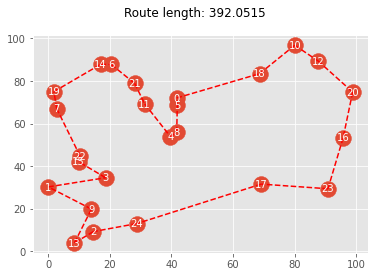

In [69]:
from pymoo.problems.single.traveling_salesman import visualize
from pprint import pprint
pprint(res.X)
visualize(problem, res.X)

array([ 0, 24,  3, 21,  6, 14, 14, 22, 15,  1, 15,  0,  0, 18, 10, 10,  0,
       24,  2, 24, 24,  1,  3,  3,  0])


/home/yinan/book-env/lib/python3.8/site-packages/pymoo/problems/single/traveling_salesman.py:79: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


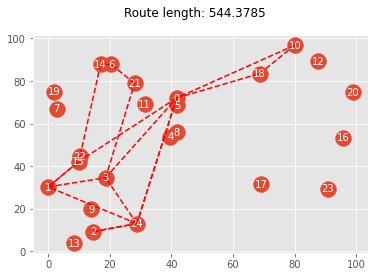

In [70]:
pprint(res2.X)
visualize(problem, res2.X)